### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [2]:
# a) Understand Columns
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# b) check dtype -> df[col].astype()
df.info()
# Time -> int (not datetime as it's duration)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Time doesnt contain float value all are int so convert it
df[df['Time'] != df['Time'].astype(int)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [5]:
# Time -> int
df['Time'] = df['Time'].astype(int)
df['Time']

0              0
1              0
2              1
3              1
4              2
           ...  
284802    172786
284803    172787
284804    172788
284805    172788
284806    172792
Name: Time, Length: 284807, dtype: int32

In [6]:
# c) Describe Numerical Cols
df.describe()
## noise data:
## largest time is 2days duration from first transaction (so no noise/wrong data)
## V1 -> V28 are PCA Values (so we can't determine if it have wrong/noise data or not so leave it)
## Amount (0 is wrong values, 25691 could be wrong value but must invstigate it first with data holder so we will leave it as it's)
## Amount: 25691 is outlier

# V1 (-56, 2.45)
# V2 (-72, 22)
# V3 (-48, 9.38)
# V1 -> V28 (not scaled)
# Time (not scaled)
# Amount (not scaled)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# remove them as they are only 1825 small data
df[df['Amount'] == 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


In [8]:
amount_wrong_indices = df[df['Amount'] == 0].index
df.drop(amount_wrong_indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282977,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
282978,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
282979,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
282980,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,...,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000,282982.000000
mean,94848.963528,-0.000349,-0.002017,-0.003293,-0.011987,-0.002241,-0.001304,0.002510,0.000028,0.001465,...,-0.000049,-0.001609,0.000147,0.000201,-0.000508,-0.001365,0.000254,0.000193,88.919401,0.001643
std,47482.459589,1.956749,1.650490,1.514216,1.404850,1.378815,1.331592,1.233940,1.191173,1.099061,...,0.732650,0.725575,0.623032,0.605795,0.520985,0.481928,0.402986,0.330351,250.824374,0.040503
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.010000,0.000000
25%,54251.250000,-0.920128,-0.602287,-0.893646,-0.853056,-0.693746,-0.769031,-0.551877,-0.208947,-0.642803,...,-0.228981,-0.543990,-0.161743,-0.354714,-0.317651,-0.327900,-0.070787,-0.052889,5.990000,0.000000
50%,84707.500000,0.016891,0.062913,0.177459,-0.025952,-0.055518,-0.276678,0.041956,0.021510,-0.050516,...,-0.030056,0.004981,-0.011071,0.040981,0.015640,-0.054345,0.001340,0.011318,22.490000,0.000000
75%,139363.750000,1.315431,0.803483,1.022961,0.731168,0.610334,0.394015,0.571967,0.326754,0.598954,...,0.186199,0.527042,0.148023,0.439992,0.350331,0.239661,0.091351,0.078438,78.000000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
# d) Describe Categorical Cols: no categorical columns so let's see how much is our target
df['Class'].value_counts(normalize=True) * 100

0    99.835679
1     0.164321
Name: Class, dtype: float64

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

Numeric Column 'Time' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


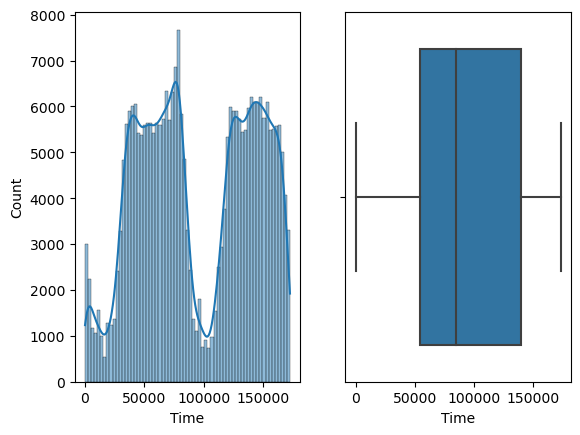

Numeric Column 'V1' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


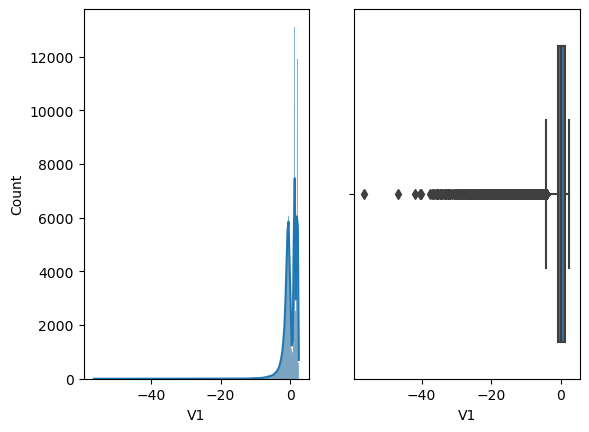

Numeric Column 'V2' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


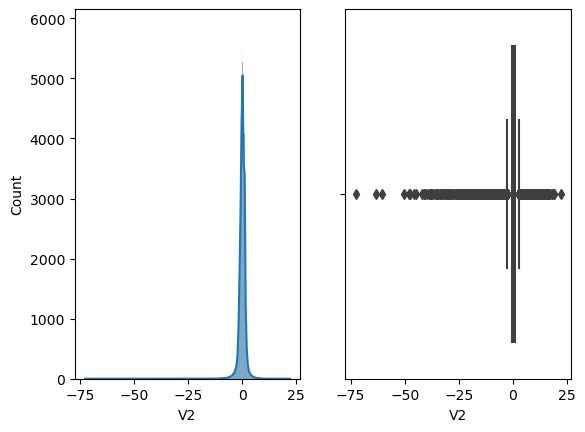

Numeric Column 'V3' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


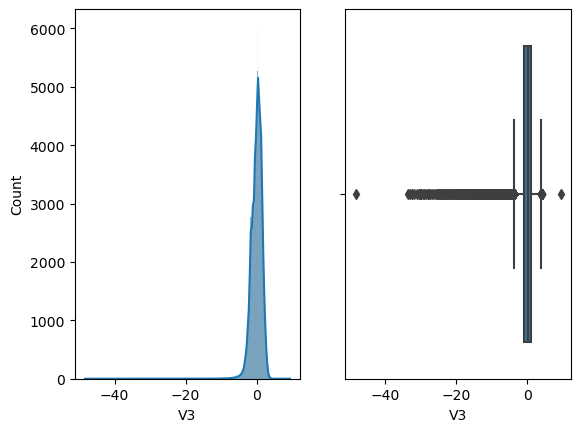

Numeric Column 'V4' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


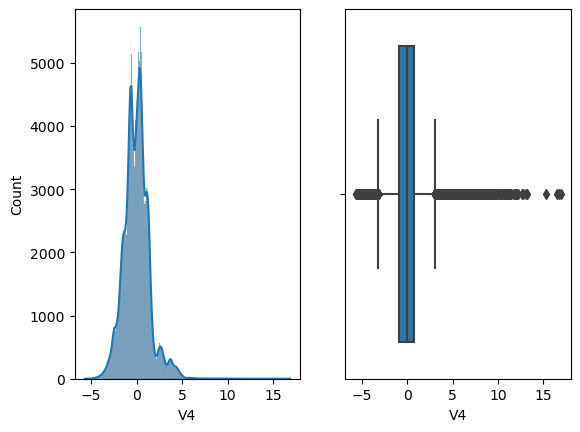

Numeric Column 'V5' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


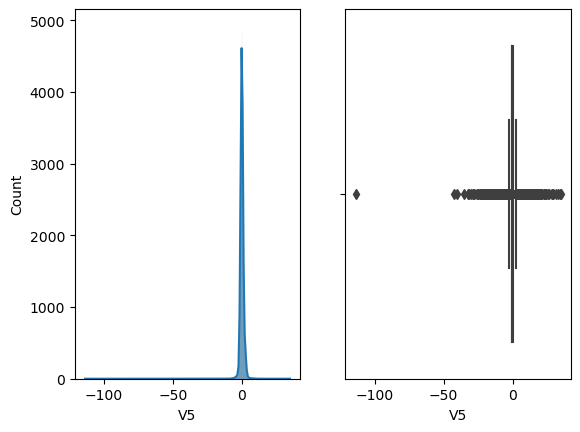

Numeric Column 'V6' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


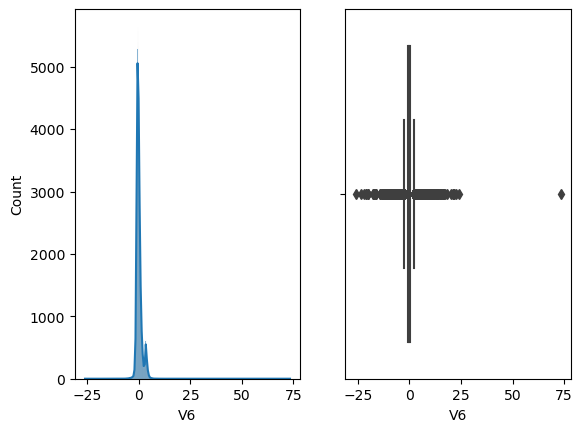

Numeric Column 'V7' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


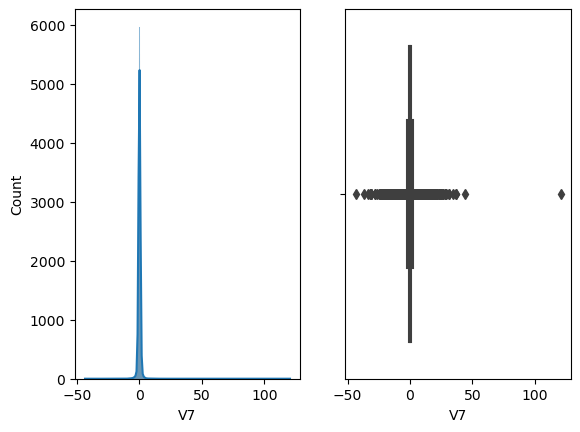

Numeric Column 'V8' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


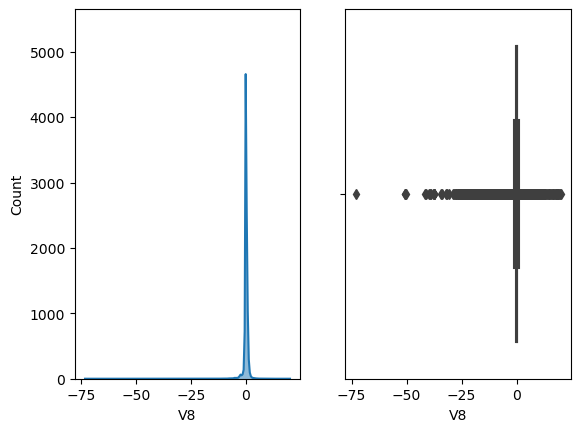

Numeric Column 'V9' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


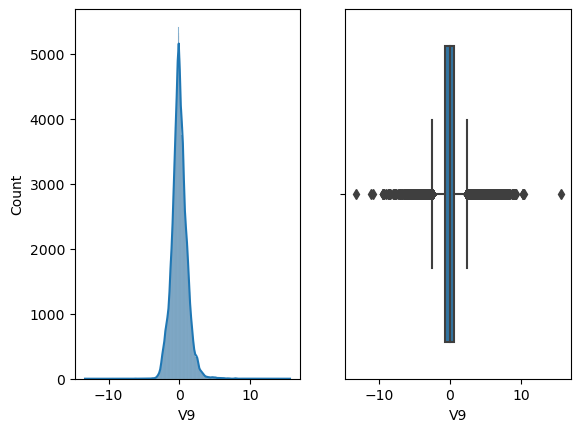

Numeric Column 'V10' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


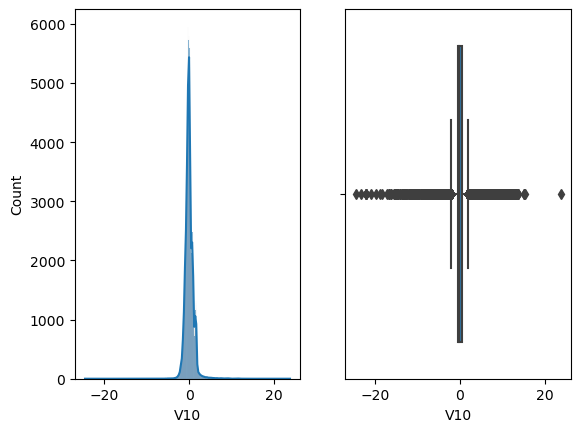

Numeric Column 'V11' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


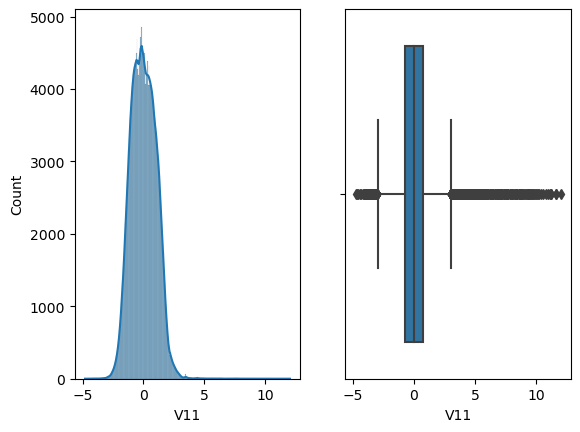

Numeric Column 'V12' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


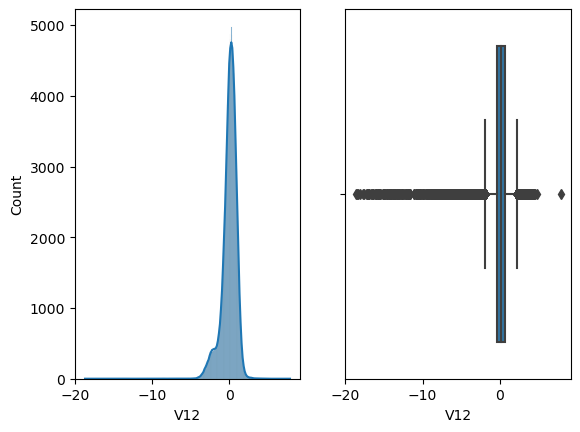

Numeric Column 'V13' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


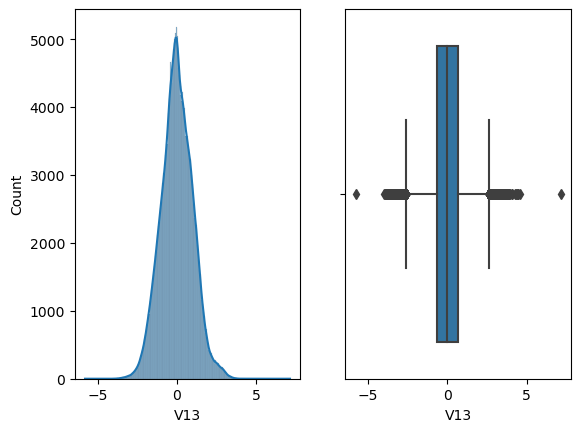

Numeric Column 'V14' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


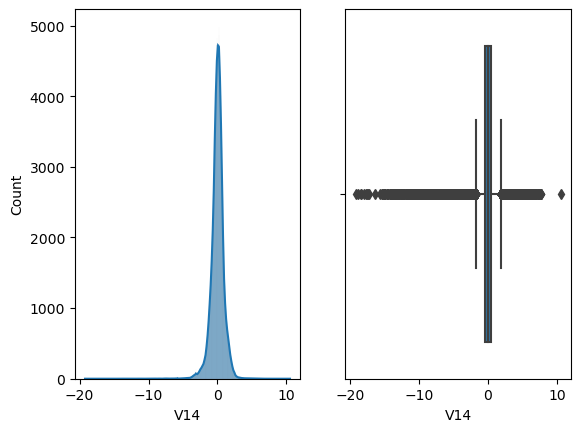

Numeric Column 'V15' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


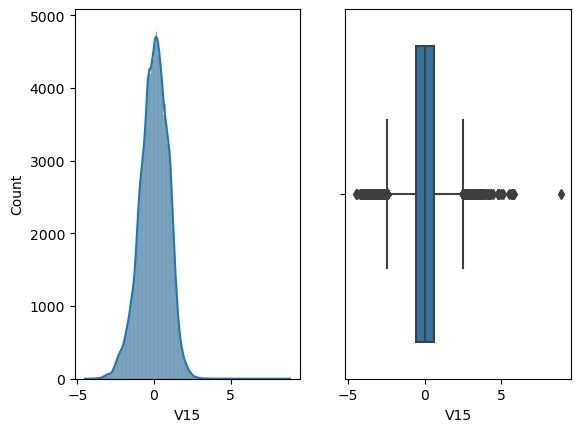

Numeric Column 'V16' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


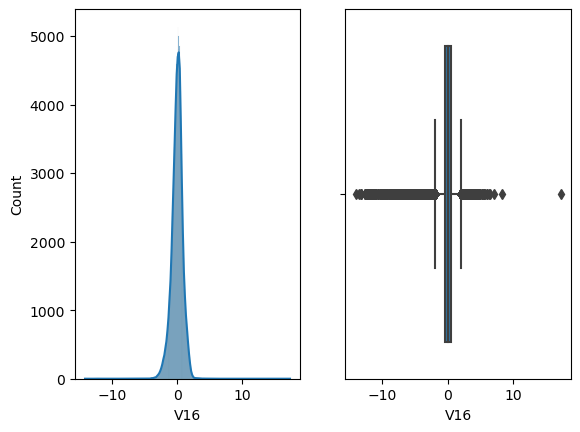

Numeric Column 'V17' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


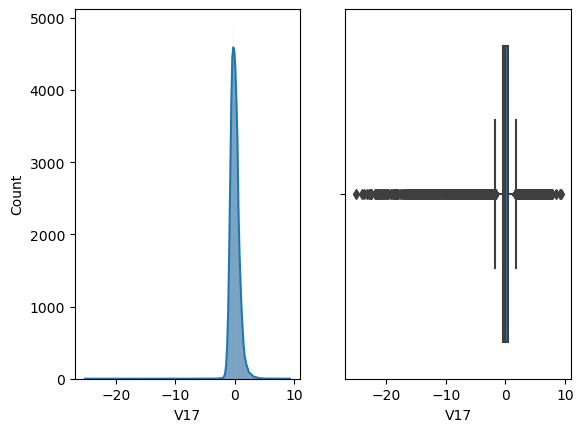

Numeric Column 'V18' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


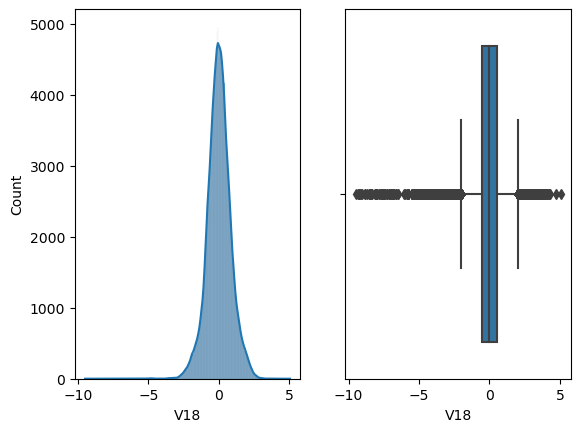

Numeric Column 'V19' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


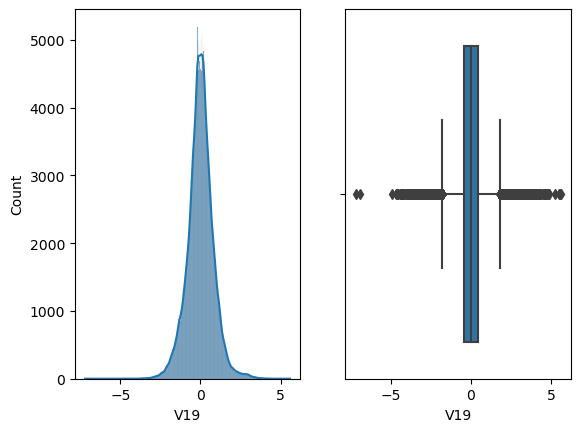

Numeric Column 'V20' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


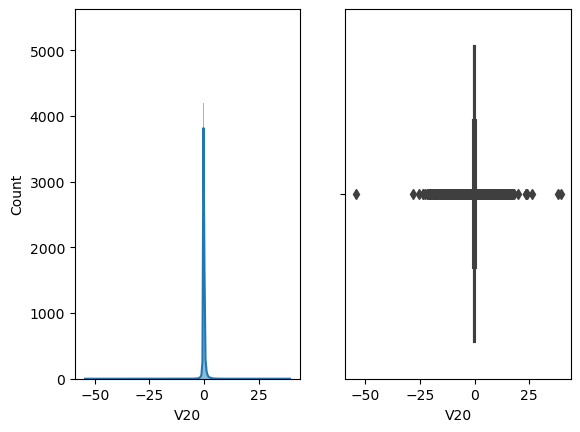

Numeric Column 'V21' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


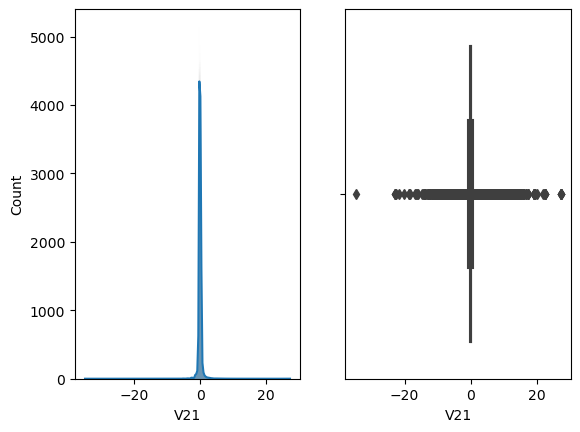

Numeric Column 'V22' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


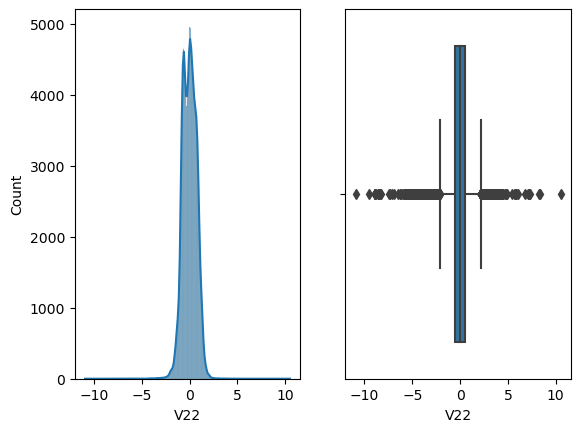

Numeric Column 'V23' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


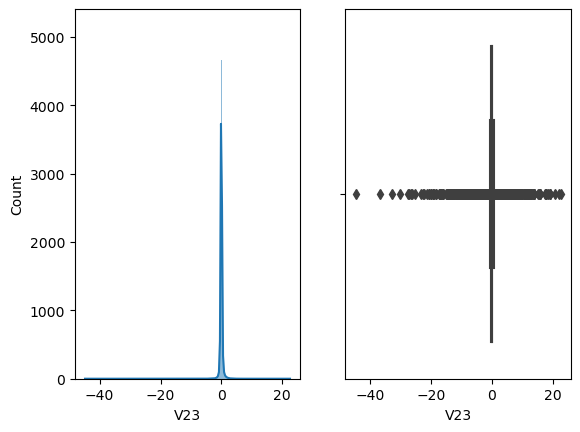

Numeric Column 'V24' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


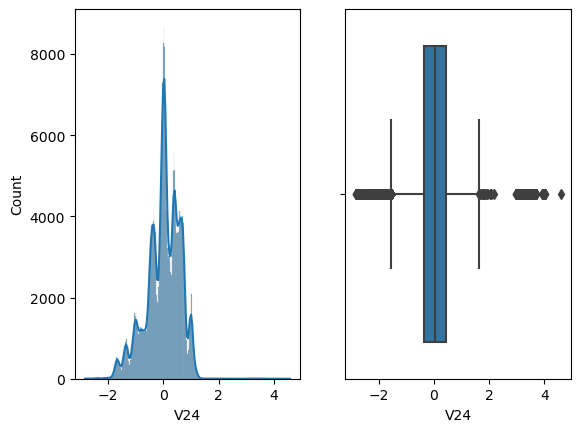

Numeric Column 'V25' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


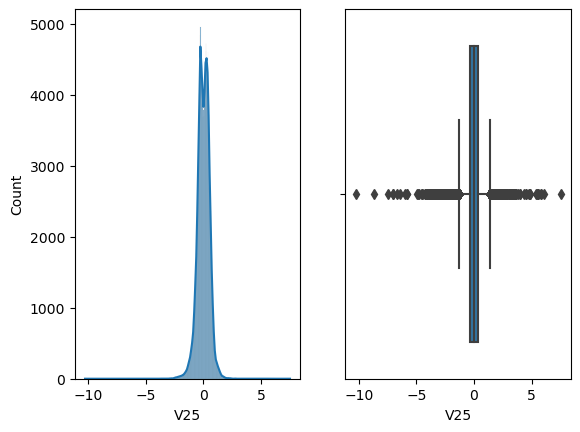

Numeric Column 'V26' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


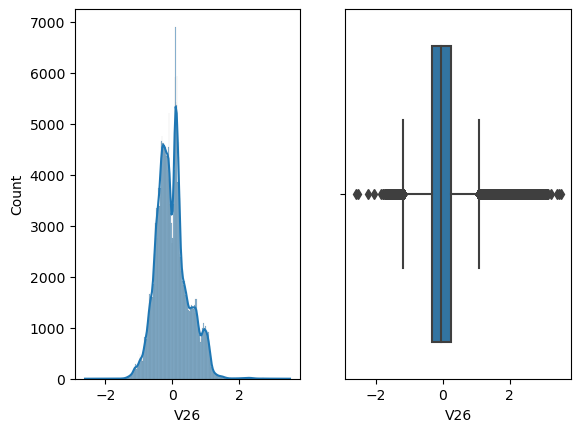

Numeric Column 'V27' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


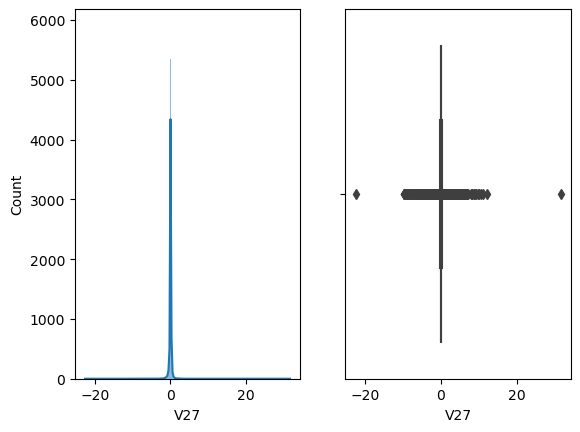

Numeric Column 'V28' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


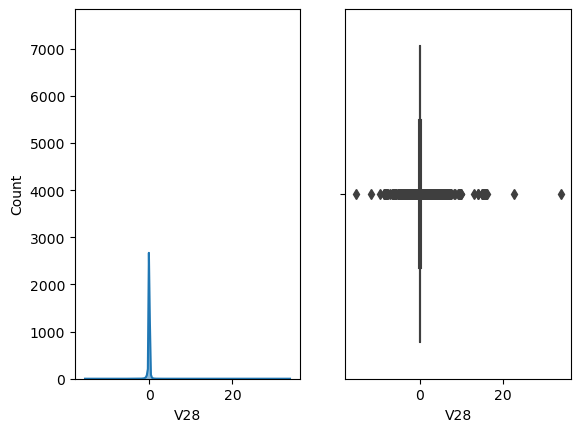

Numeric Column 'Amount' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


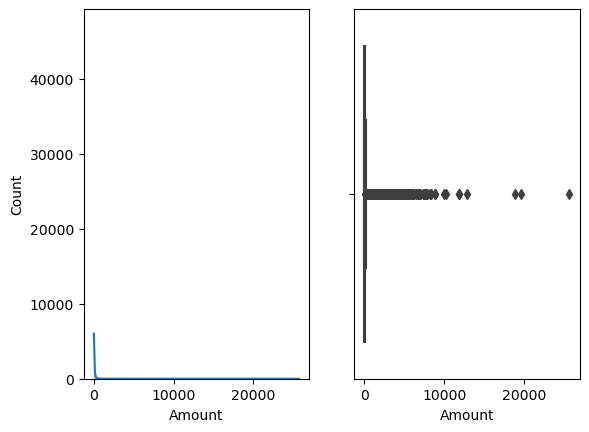

Numeric Column 'Class' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


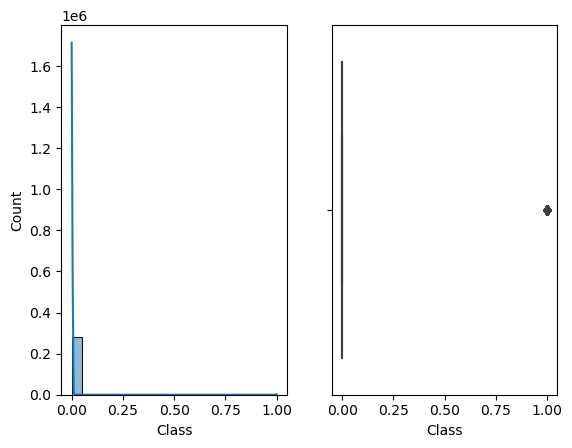

In [11]:
# No Features to Extract Sadly
## EDA
# Univariate Analysis
num_cols = df.columns

for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    print(f'Numeric Column \'{col}\' Analysis')
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

# Time -> could be 2 normal distrbution using rbf_kernel => Normal Dist
# V1 -> V28: (IQR) => Normal Dist
# Amount: right skewed (log: remove outliers) => Normal Dist

<Axes: >

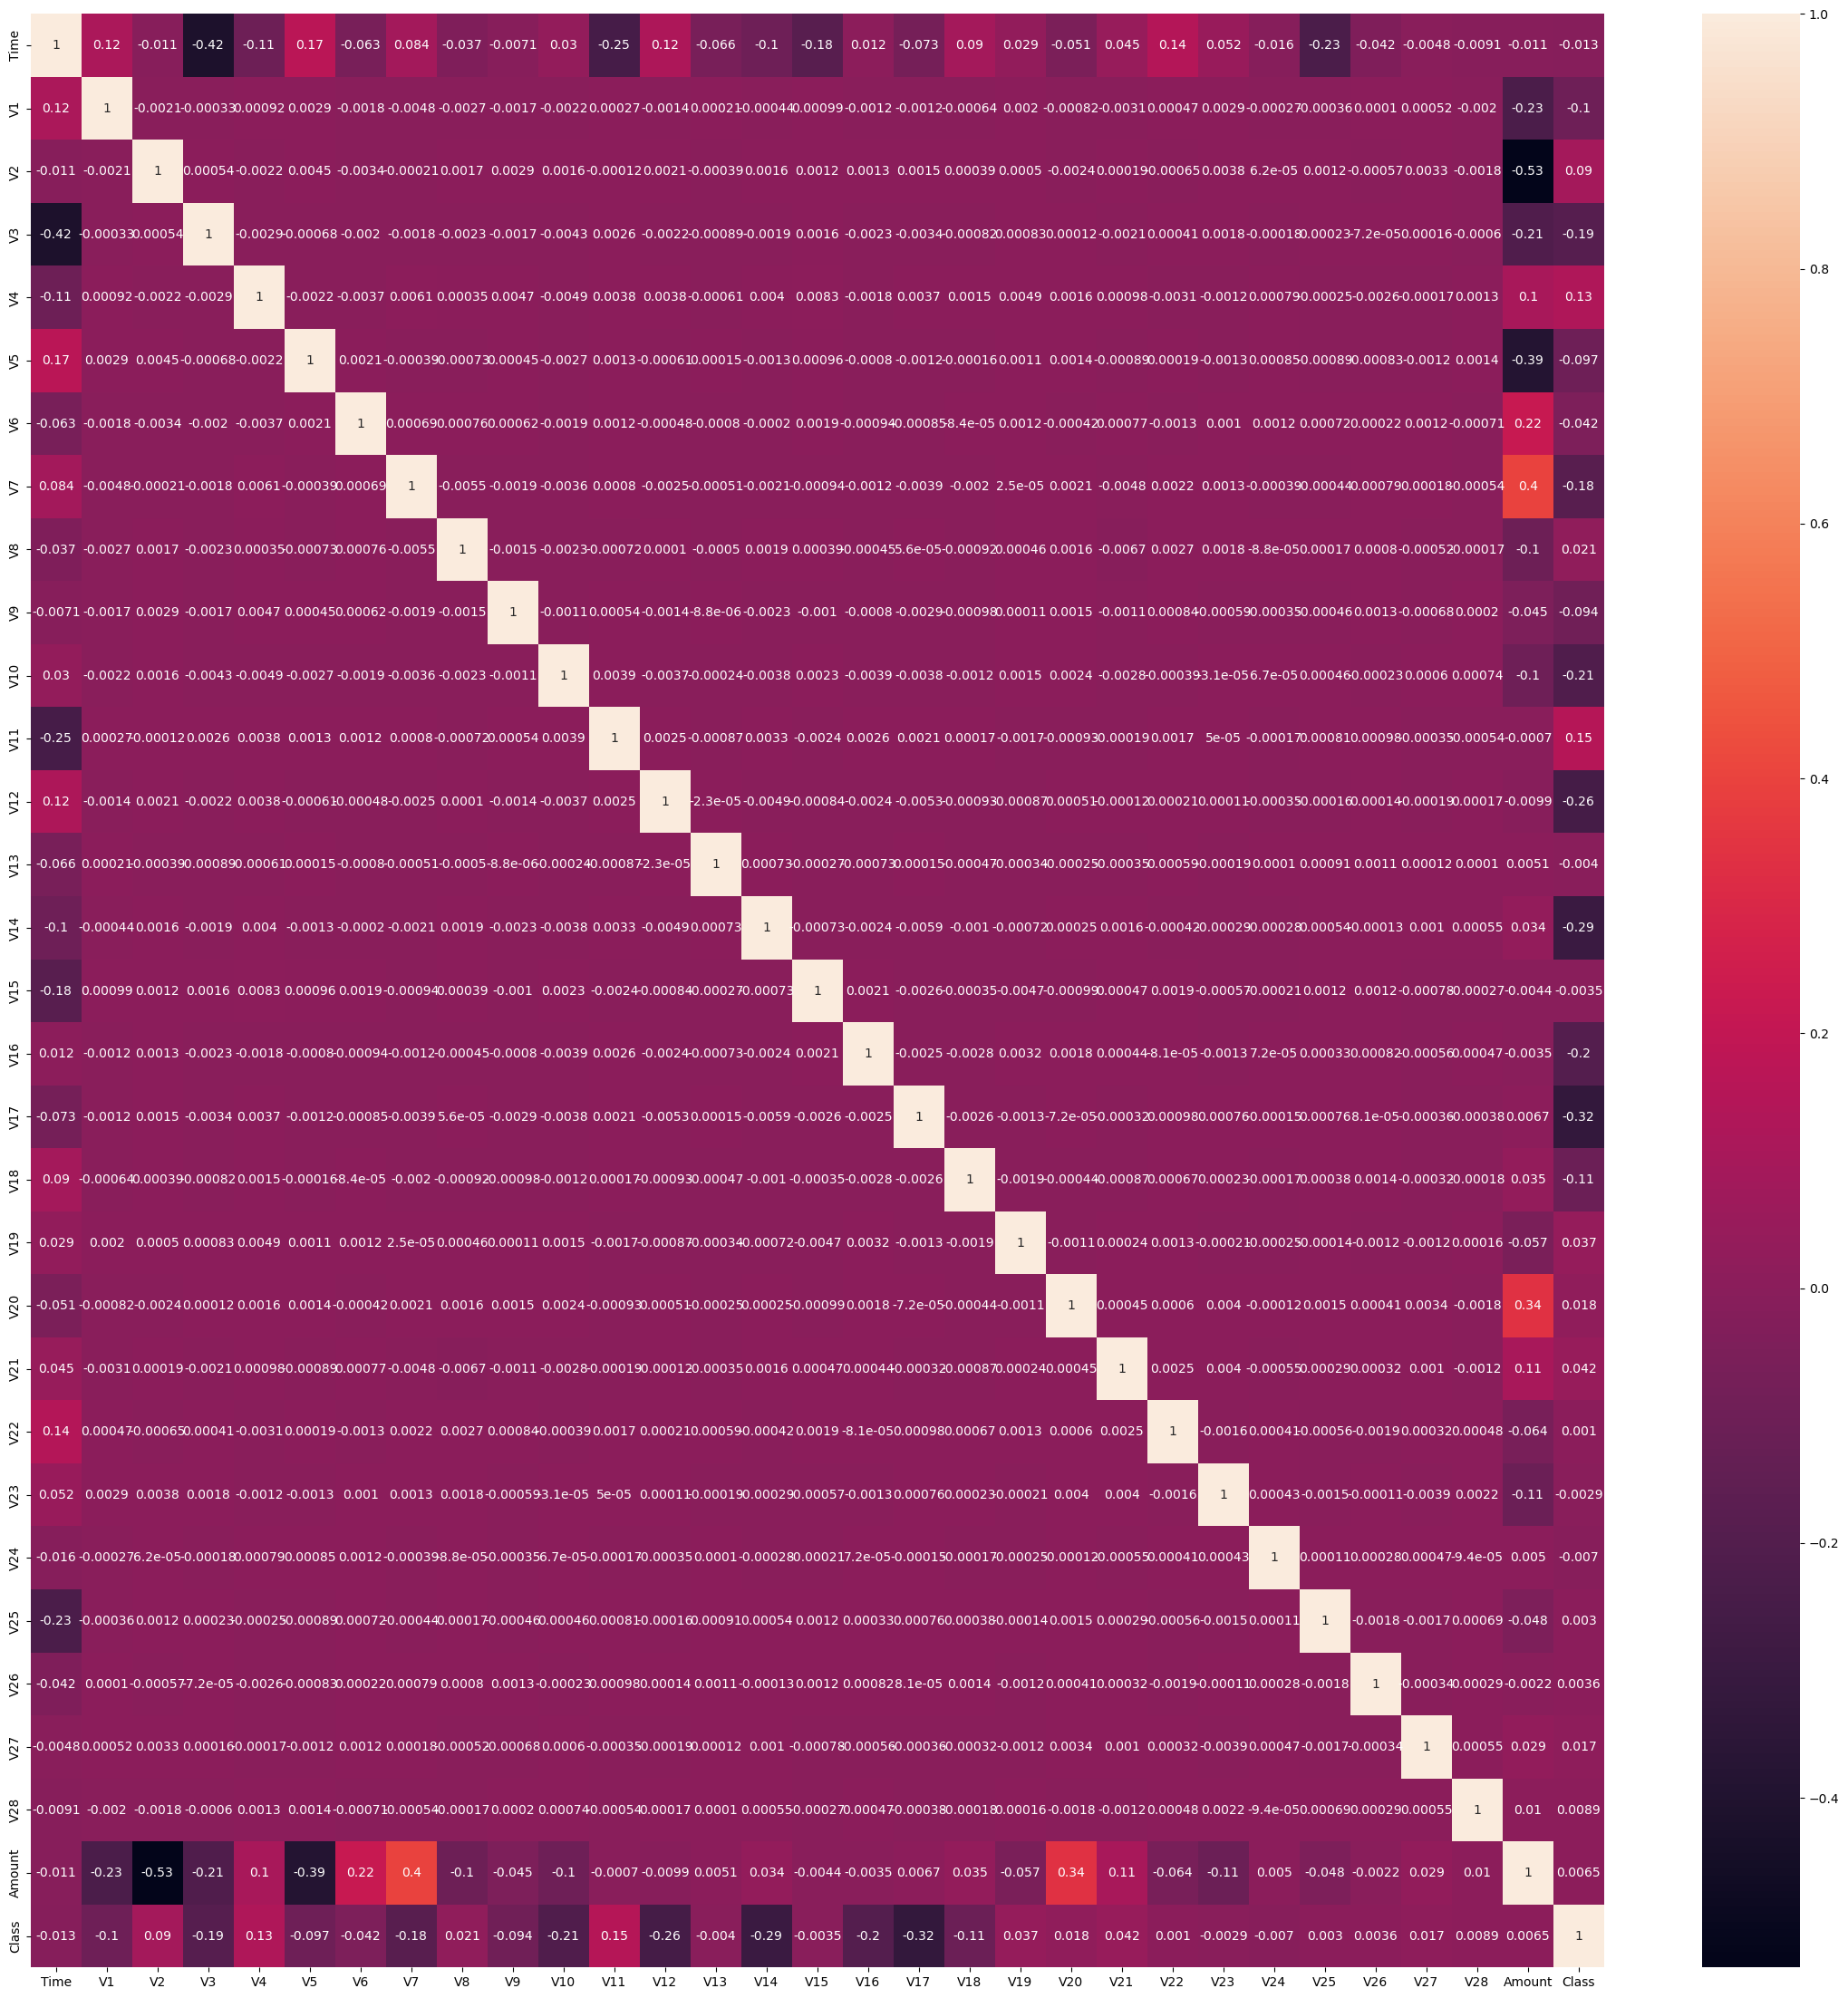

In [12]:
# Cat: no categorical columns to view pie chart or Barplot
## Bi-variate
plt.figure(figsize=(28, 28))
sns.heatmap(df.corr(), annot=True) # not correct to visualize imbalanced corr matrix

In [13]:
## bi-variate quesiton

In [14]:
## Multi-variate: took long time
# sns.pairplot(df)

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [15]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

1064

In [16]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281913,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
281914,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
281915,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
281916,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
df['Class'].value_counts(normalize=True) * 100

0    99.841089
1     0.158911
Name: Class, dtype: float64

In [18]:
# b) train_test_split
X = df.drop("Class", axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
58896,48923,-0.208410,0.818544,1.402278,-0.102480,0.571396,-0.475078,0.766415,-0.197104,-0.679896,...,0.125142,-0.221113,-0.542801,-0.097479,-0.028749,-0.232187,0.022847,-0.164729,-0.197920,1.98
233834,148756,1.585458,-1.682603,-1.778289,0.014642,-0.642479,-0.548470,0.092731,-0.361649,-0.369115,...,0.028697,-0.084125,-0.323171,-0.236148,-0.693400,-0.042408,0.467900,-0.096325,-0.011158,332.20
279757,171036,2.017751,0.038287,-1.625182,0.355745,0.290865,-0.687759,0.017754,-0.043629,0.375752,...,-0.215797,-0.312191,-0.881265,0.362561,0.641907,-0.347782,0.145968,-0.072973,-0.040881,1.98
176432,123583,1.942089,-0.350003,-0.737433,0.876342,-0.313938,-0.412377,-0.113845,-0.098072,1.180720,...,-0.189862,-0.341849,-0.669655,0.337174,1.170343,-0.170566,0.037381,-0.037859,-0.042880,27.39
259111,160180,-1.065932,0.689740,-0.702538,1.238715,0.034564,-1.014630,0.007764,0.442163,-1.004030,...,0.024272,0.056794,0.037905,-0.157134,0.002289,-0.881890,0.823668,-0.068640,-0.132817,49.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,76164,1.251638,0.050525,0.041849,0.106174,-0.450154,-1.330370,0.281593,-0.264474,0.085386,...,-0.088945,-0.440947,-1.430847,0.198776,0.373607,0.057090,0.623126,-0.112526,0.005897,32.38
76292,56937,-0.950152,1.667708,1.350383,1.433918,0.612446,-0.607242,1.792074,-1.667508,-1.144952,...,-0.330538,0.797903,0.128362,-0.097402,0.708543,-0.049264,-0.224724,-0.549751,-0.343490,63.89
163375,117186,1.948101,-0.429161,-0.404592,0.372326,-0.530825,-0.135926,-0.665652,0.092814,0.799565,...,-0.164782,0.231312,0.761140,0.123760,-0.359469,-0.293981,0.361348,-0.016413,-0.056059,18.00
180215,125269,-0.174562,1.102572,1.590212,2.712767,0.408560,0.864489,0.210115,0.312282,-1.147770,...,-0.234836,0.296821,0.827010,-0.129034,-0.362087,-0.486419,-0.059181,-0.046591,0.047788,7.55


In [19]:
X_test.shape

(56384, 30)

In [20]:
y_train.value_counts(normalize=True) * 100

0    99.841266
1     0.158734
Name: Class, dtype: float64

In [21]:
y_test.value_counts(normalize=True) * 100

0    99.84038
1     0.15962
Name: Class, dtype: float64

In [22]:
# c) Detect & Handle NaNs
X_train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [23]:
# d) Detect & Handle Outliers:

# Time => rbf_kernel (unskewed distrbution become -> 2 normal dist) but won't help unless time=50K group help determine target otherwise won't make big diffrence
# V1 -> V28 => IQR (cant remove outliers as it remove dataset so smaller accuracy + cant handle using ub_lb as no domain knowledge in thses features)
# Amount => log (to remove outliers and always good)

# could be done after Solving Imbalanced First (to remove outliers of data you will work on):
# a) Solve Imbalanced: (UnderSampling)
# b) Corr Matrix Solved_imbalanced (to get most important features affect the target)
# c) Remove outliers of most important features (from each class)

### Handling Outliers Summery:

* 1) Dont use ub_lb on features you don't understand
* 2) Normaly: remove outliers of most important features **for each class** if dataset is large enough 
(if it's small dataset dont remove outliers)
* 3) rbf_kernel extract features but not nessacry can help model => will help only if this new feature group fraud transactions togther otherwise will not help so it's experiment

In [24]:
# a) Solve Imbalanced: (UnderSampling)
y_train.value_counts()

0    225176
1       358
Name: Class, dtype: int64

In [25]:
random_undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = random_undersampler.fit_resample(X_train, y_train)
X_train_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12592,22397,1.034991,0.000412,1.311641,1.453700,-0.727097,0.118626,-0.643170,0.085898,1.765946,...,-0.086016,0.028601,0.288763,-0.016649,0.018199,0.227365,-0.361963,0.043763,0.040174,58.00
19238,30325,1.370810,-0.415848,0.080589,-0.578325,-0.560865,-0.596140,-0.263610,-0.224358,-0.937653,...,0.101070,0.195104,0.695759,-0.153958,0.170658,0.752977,-0.040360,0.013539,0.004168,17.00
49341,44292,-0.831199,0.765118,0.645460,0.426824,0.257747,0.117694,1.975706,-0.664110,-0.313365,...,-0.450940,0.054810,0.613054,-0.225288,0.000066,-0.456048,-0.498755,-0.533759,-0.337522,173.00
118634,75636,-0.752910,1.135675,0.743570,-0.119833,-0.049034,-0.089450,0.064034,0.758315,-0.542535,...,-0.105593,-0.180581,-0.676602,0.050075,-0.408611,-0.252216,0.112590,0.119416,0.015067,8.97
233857,148766,1.960292,-0.447238,-1.230321,0.131331,-0.102744,-0.450977,-0.083862,-0.088744,0.953746,...,-0.190831,0.130199,0.597546,-0.034359,-0.340092,0.177066,0.198297,-0.035004,-0.071863,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110475,72327,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90
149107,93860,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00
153123,102676,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74
187613,128471,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90


In [26]:
y_train_resampled.value_counts()

0    358
1    358
Name: Class, dtype: int64

<Axes: >

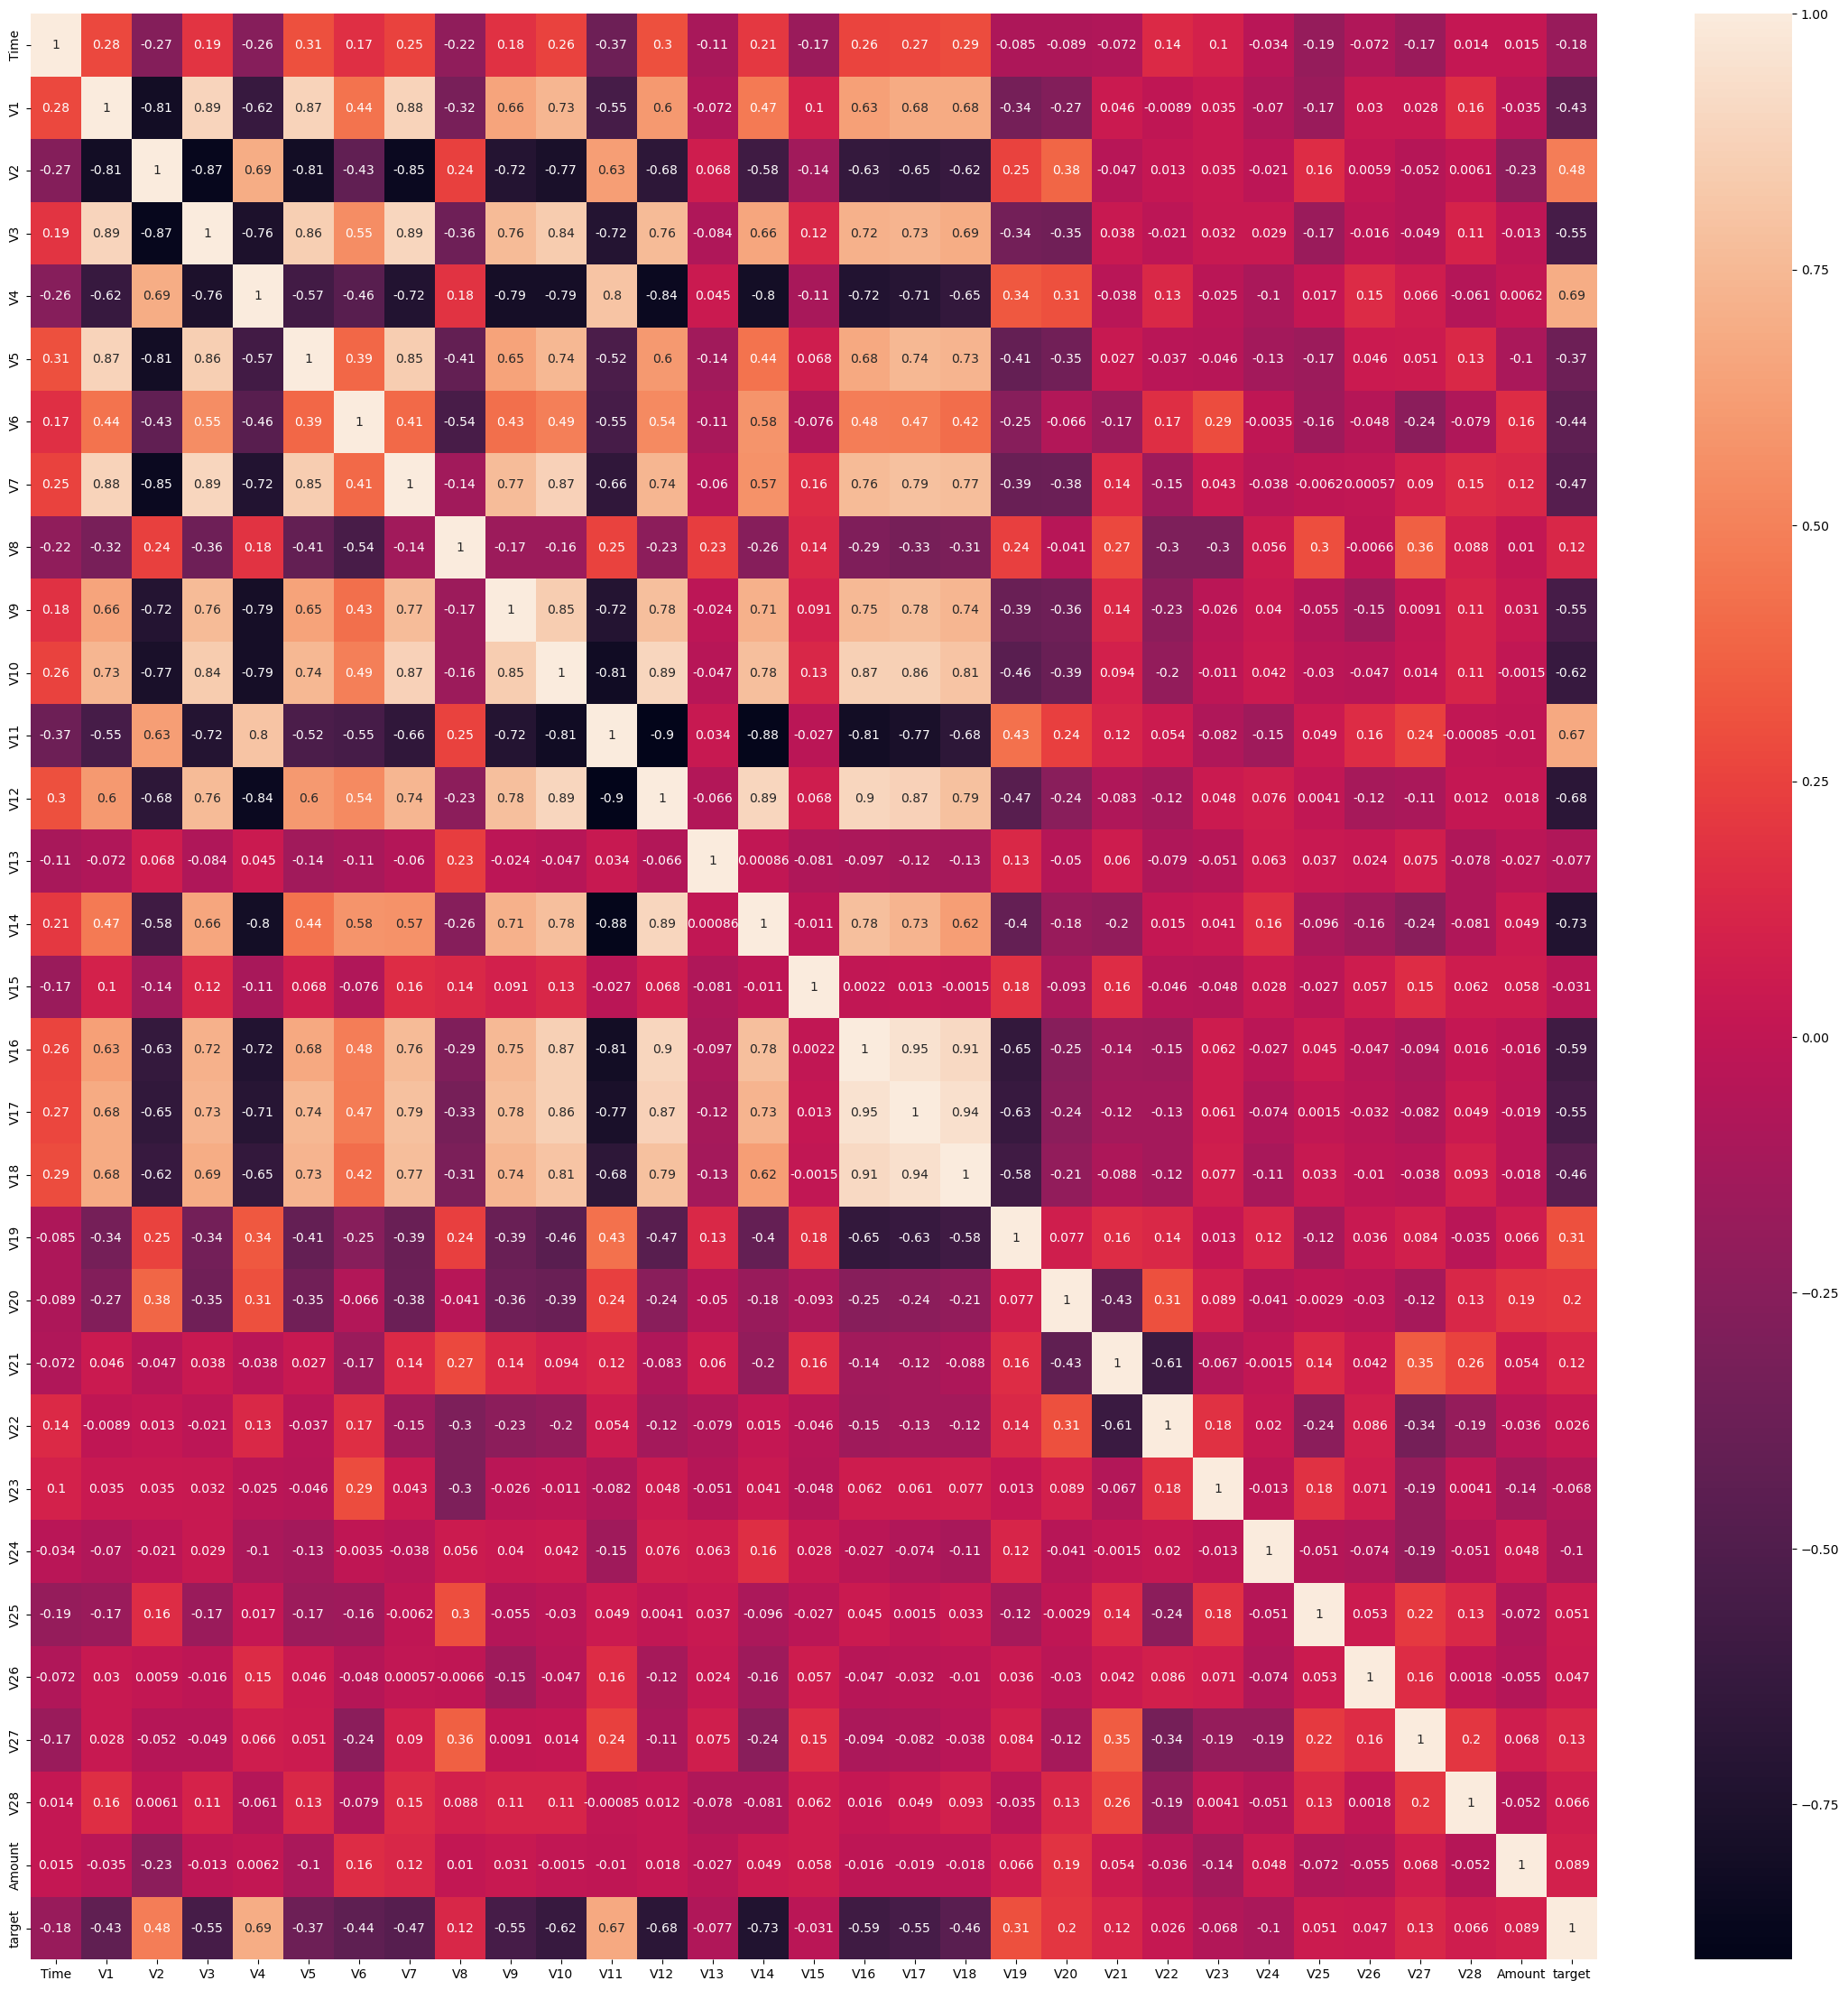

In [27]:
# b) Corr Matrix Solved_imbalanced
plt.figure(figsize=(28, 28))
train_df = X_train_resampled.copy()
train_df['target'] = y_train_resampled
sns.heatmap(train_df.corr(), annot=True) # Most Important Features: V4, V10, V11, V12, V14 

Numeric Column 'Log Amount' Analysis


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


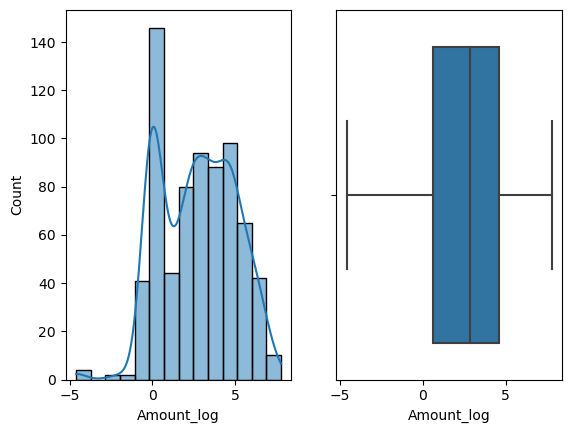

In [28]:
X_train_resampled['Amount_log'] = np.log(X_train_resampled['Amount'])
X_test['Amount_log'] = np.log(X_test['Amount'])
X_train_resampled.drop("Amount", axis=1, inplace=True)
X_test.drop("Amount", axis=1, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
print(f'Numeric Column \'Log Amount\' Analysis')
sns.histplot(X_train_resampled['Amount_log'], kde=True, ax=axes[0])
sns.boxplot(X_train_resampled['Amount_log'], ax=axes[1])
plt.show()

In [29]:
# Scaled
std_scaler_cols = ['Amount_log']
std_scaler = StandardScaler()
X_train_resampled[std_scaler_cols] = std_scaler.fit_transform(X_train_resampled[std_scaler_cols])
X_test[std_scaler_cols] = std_scaler.transform(X_test[std_scaler_cols])

all_columns = X_train_resampled.columns
rbst_scaler_cols = all_columns.drop(std_scaler_cols)

rbst_scaler = RobustScaler()
X_train_resampled[rbst_scaler_cols] = rbst_scaler.fit_transform(X_train_resampled[rbst_scaler_cols])
X_test[rbst_scaler_cols] = rbst_scaler.transform(X_test[rbst_scaler_cols])
X_train_resampled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
count,716.000000,716.000000,7.160000e+02,716.000000,7.160000e+02,716.000000,716.000000,7.160000e+02,7.160000e+02,716.000000,...,7.160000e+02,7.160000e+02,7.160000e+02,716.000000,716.000000,716.000000,7.160000e+02,7.160000e+02,716.000000,7.160000e+02
mean,0.109123,-0.419715,2.849425e-01,-0.407599,2.494858e-01,-0.520724,-0.043679,-6.249056e-01,3.857429e-01,-0.242639,...,2.677399e-01,1.900939e-01,-3.532272e-02,-0.081647,-0.083671,-0.012259,4.838710e-02,1.438603e-01,-0.000513,-4.961891e-17
std,0.558294,1.484481,1.294469e+00,1.173420,7.589173e-01,1.895982,1.046250,1.737068e+00,3.824659e+00,0.960893,...,1.820152e+00,2.477848e+00,8.968019e-01,2.851581,0.745625,0.935965,7.426236e-01,1.917521e+00,1.732123,1.000699e+00
min,-0.874694,-7.972626,-3.676212e+00,-5.576264,-1.107463e+00,-9.735655,-3.083270,-1.335668e+01,-3.782094e+01,-5.420401,...,-2.179641e+01,-2.831128e+01,-8.350120e+00,-45.064997,-2.726883,-6.457239,-1.778260e+00,-1.513628e+01,-7.735238,-3.283173e+00
25%,-0.378591,-0.526726,-4.003852e-01,-0.688266,-2.885651e-01,-0.606769,-0.529463,-7.276352e-01,-3.164988e-01,-0.663433,...,-3.245979e-01,-3.752402e-01,-5.388398e-01,-0.511990,-0.516715,-0.494419,-4.386692e-01,-2.207142e-01,-0.365512,-9.648502e-01
50%,0.000000,0.000000,1.994932e-17,0.000000,2.667137e-17,0.000000,0.000000,1.723881e-17,1.276648e-17,0.000000,...,1.409463e-18,-1.734723e-17,3.035766e-18,0.000000,0.000000,0.000000,1.355253e-18,7.209944e-18,0.000000,3.556513e-02
75%,0.621409,0.473274,5.996148e-01,0.311734,7.114349e-01,0.393231,0.470537,2.723648e-01,6.835012e-01,0.336567,...,6.754021e-01,6.247598e-01,4.611602e-01,0.488010,0.483285,0.505581,5.613308e-01,7.792858e-01,0.634488,8.330252e-01
max,1.080018,0.822648,7.624244e+00,0.828800,2.631522e+00,5.149414,4.475391,1.874407e+00,1.825068e+01,2.027397,...,1.803992e+01,3.340405e+01,7.723755e+00,15.744451,1.450454,4.804275,4.260719e+00,7.055890e+00,9.767668,2.251061e+00


# Modeling

In [30]:
from sklearn.linear_model import LogisticRegression

logstic_clf = LogisticRegression(random_state=42)
logstic_clf.fit(X_train_resampled, y_train_resampled)
logstic_clf

LogisticRegression(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
# train accuracy
y_train_pred = logstic_clf.predict(X_train_resampled)
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred)}") # train accuracy
print(f"Train F1 Score: {f1_score(y_train_resampled, y_train_pred)}") # train F1
print(f"Train Precsion: {precision_score(y_train_resampled, y_train_pred)}") # train Precsion
print(f"Train Recall: {recall_score(y_train_resampled, y_train_pred)}") # train Recall

Train Accuracy: 0.9385474860335196
Train F1 Score: 0.936231884057971
Train Precsion: 0.9728915662650602
Train Recall: 0.9022346368715084


### Performance of the model on data he never seen (Valid)

In [32]:
# Valid Accuracy

# cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
from sklearn.model_selection import StratifiedKFold # SKFolds
from sklearn.model_selection import StratifiedShuffleSplit # SSS

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    print(y_train.iloc[train_index].value_counts(normalize=True) *100)
    print(y_train.iloc[valid_index].value_counts(normalize=True) *100)
    print()

0    99.840933
1     0.159067
Name: Class, dtype: float64
0    99.842596
1     0.157404
Name: Class, dtype: float64

0    99.841487
1     0.158513
Name: Class, dtype: float64
0    99.84038
1     0.15962
Name: Class, dtype: float64

0    99.841487
1     0.158513
Name: Class, dtype: float64
0    99.84038
1     0.15962
Name: Class, dtype: float64

0    99.841487
1     0.158513
Name: Class, dtype: float64
0    99.84038
1     0.15962
Name: Class, dtype: float64

0    99.840934
1     0.159066
Name: Class, dtype: float64
0    99.842593
1     0.157407
Name: Class, dtype: float64



In [33]:
from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(BaseEstimator, TransformerMixin):
    
    # fit
    def fit(self, X, y=None):
        self.n_features_in = X.shape[1]
        return self
    
    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)
    
log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [34]:
rest_cols = X_train.columns.drop("Amount")
rest_cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [35]:
# train_test_split (as pipeline will handle the Amount Column Internaly)
X = df.drop("Class", axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
58896,48923,-0.208410,0.818544,1.402278,-0.102480,0.571396,-0.475078,0.766415,-0.197104,-0.679896,...,0.125142,-0.221113,-0.542801,-0.097479,-0.028749,-0.232187,0.022847,-0.164729,-0.197920,1.98
233834,148756,1.585458,-1.682603,-1.778289,0.014642,-0.642479,-0.548470,0.092731,-0.361649,-0.369115,...,0.028697,-0.084125,-0.323171,-0.236148,-0.693400,-0.042408,0.467900,-0.096325,-0.011158,332.20
279757,171036,2.017751,0.038287,-1.625182,0.355745,0.290865,-0.687759,0.017754,-0.043629,0.375752,...,-0.215797,-0.312191,-0.881265,0.362561,0.641907,-0.347782,0.145968,-0.072973,-0.040881,1.98
176432,123583,1.942089,-0.350003,-0.737433,0.876342,-0.313938,-0.412377,-0.113845,-0.098072,1.180720,...,-0.189862,-0.341849,-0.669655,0.337174,1.170343,-0.170566,0.037381,-0.037859,-0.042880,27.39
259111,160180,-1.065932,0.689740,-0.702538,1.238715,0.034564,-1.014630,0.007764,0.442163,-1.004030,...,0.024272,0.056794,0.037905,-0.157134,0.002289,-0.881890,0.823668,-0.068640,-0.132817,49.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,76164,1.251638,0.050525,0.041849,0.106174,-0.450154,-1.330370,0.281593,-0.264474,0.085386,...,-0.088945,-0.440947,-1.430847,0.198776,0.373607,0.057090,0.623126,-0.112526,0.005897,32.38
76292,56937,-0.950152,1.667708,1.350383,1.433918,0.612446,-0.607242,1.792074,-1.667508,-1.144952,...,-0.330538,0.797903,0.128362,-0.097402,0.708543,-0.049264,-0.224724,-0.549751,-0.343490,63.89
163375,117186,1.948101,-0.429161,-0.404592,0.372326,-0.530825,-0.135926,-0.665652,0.092814,0.799565,...,-0.164782,0.231312,0.761140,0.123760,-0.359469,-0.293981,0.361348,-0.016413,-0.056059,18.00
180215,125269,-0.174562,1.102572,1.590212,2.712767,0.408560,0.864489,0.210115,0.312282,-1.147770,...,-0.234836,0.296821,0.827010,-0.129034,-0.362087,-0.486419,-0.059181,-0.046591,0.047788,7.55


In [36]:
standardscaler_pipeline = Pipeline(steps=[
    ('log', LogTransformer()),
    ("scale", StandardScaler())
])

robust_pipeline = Pipeline(steps=[
    ("scale", RobustScaler())
])

rest_cols = X_train.columns.drop("Amount")
preprocessor = ColumnTransformer(transformers=[
    ('standardscaler_pipeline', standardscaler_pipeline, ['Amount']),
    ('robust_pipeline', robust_pipeline, list(rest_cols))
])


from imblearn.pipeline import Pipeline as Imbalanced_Pipeline

undersampling_preprocessor = Imbalanced_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersampling', RandomUnderSampler(random_state=42))
])
undersampling_preprocessor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler_pipeline',
                                                  Pipeline(steps=[('log',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Amount']),
                                                 ('robust_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27',
                                                   'V28'])])),
                ('undersampling', RandomUnderSampler(random_state=42))])

# Valid Accuracy

In [37]:
# Valid Accuracy

# cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
from sklearn.model_selection import StratifiedKFold # SKFolds
from sklearn.model_selection import StratifiedShuffleSplit # SSS

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('model', LogisticRegression(random_state=42))
    ])
    undersampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9596025509810928
Average Valid F1 Score: 0.06717669853945588
Average Valid Precsion: 0.034918701193077724
Average Valid Recall: 0.899452269170579


# Try More Models

In [38]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5, p=2))
    ])
    undersampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9707582838070394
Average Valid F1 Score: 0.08692711418444035
Average Valid Precsion: 0.045763862850332945
Average Valid Recall: 0.8714788732394366


In [39]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB, GaussianNB

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('model', GaussianNB())
    ])
    undersampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9657169327595302
Average Valid F1 Score: 0.07348411062365441
Average Valid Precsion: 0.03839635958161165
Average Valid Recall: 0.854851330203443


In [ ]:
# SVM

# 3) Search Hyper Parameters to raise f1

In [41]:
# Increased F1 Score by 2% than norma logestic (better than nothing)

# cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
from sklearn.model_selection import StratifiedKFold # SKFolds
from sklearn.model_selection import StratifiedShuffleSplit # SSS

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

logstic_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
grid_params = {'penalty':['l2'], "C":[0.001, 0.01, 0.1, 1.0, 10, 1000]}
grid_logistic_clf = GridSearchCV(logstic_reg_clf, grid_params, cv=3, scoring='f1')

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('grid', grid_logistic_clf)
    ])
    undersampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    best_estm_logsitic_clf = grid_logistic_clf.best_estimator_ # refit=True, Trained on 80% of X_train
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9677033468292751
Average Valid F1 Score: 0.0840127452304841
Average Valid Precsion: 0.04417070932376292
Average Valid Recall: 0.8966353677621284


In [42]:
grid_logistic_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [43]:
best_estm_logsitic_clf # trained on 80% of X_train

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

### finetinning Many Models

In [ ]:
# Increased F1 Score by 3% than normal logestic (better than nothing)

# cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
from sklearn.model_selection import StratifiedKFold # SKFolds
from sklearn.model_selection import StratifiedShuffleSplit # SSS

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

knn_clf = KNeighborsClassifier(n_neighbors=5)
grid_params = {'metric':['l1', 'l2', 'cosine'], "n_neighbors":[5, 7, 13, 25, 55, 101]}
grid_knn_clf = GridSearchCV(knn_clf, grid_params, cv=3, scoring='f1')

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('grid', grid_knn_clf)
    ])
    undersampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    best_estm_knn_clf = grid_knn_clf.best_estimator_ # refit=True, Trained on 80% of X_train
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.964098596025098
Average Valid F1 Score: 0.09874579377842899
Average Valid Precsion: 0.05276666800643383
Average Valid Recall: 0.8883411580594679


In [45]:
grid_knn_clf.best_params_

{'metric': 'l1', 'n_neighbors': 5}

In [46]:
best_estm_knn_clf

KNeighborsClassifier(metric='l1')

In [47]:
#  GaussianNB doesnt have hyperparameters to tune

In [48]:
# SVM

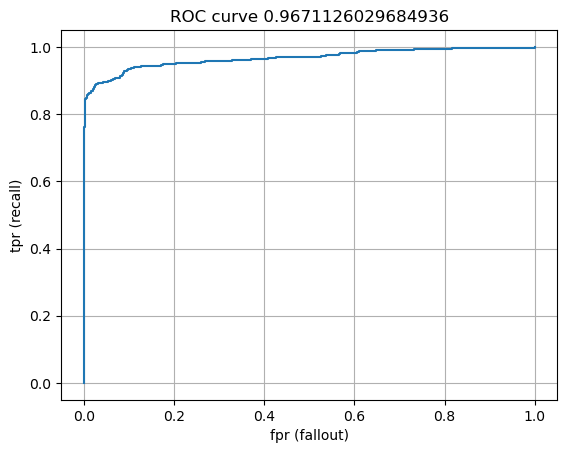

In [49]:
# Compare Models

# model trained on 100% of X_train
best_logistic_undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('model', best_estm_logsitic_clf)
    ])

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
y_scores = cross_val_predict(best_logistic_undersampling_pipeline, X_train, y_train, cv=3, method='decision_function')

precision_values, recall_values, thresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
# plt.plot(precision_values[:-1], recall_values[:-1])
plt.plot(fpr, tpr)
# plt.xlabel('recall')
# plt.ylabel('precision')
plt.title(f"ROC curve {roc_auc_score(y_train, y_scores)}")
plt.xlabel('fpr (fallout)')
plt.ylabel('tpr (recall)')
plt.grid()
plt.show()

# We Should Observe PR Curve not ROC Curve as +ve is Rare

Text(0, 0.5, 'precision')

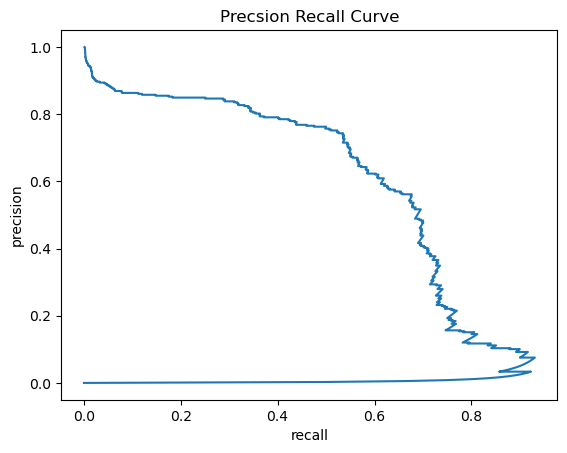

In [50]:
plt.plot(precision_values[:-1], recall_values[:-1])
plt.title("Precsion Recall Curve")
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = 0.76, Recall=0.6

# Now our model is not overfitting (not like model above)

In [51]:
# Final Model
best_logistic_undersampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampling', RandomUnderSampler(random_state=42)),
        ('model', best_estm_logsitic_clf)
    ])

best_logistic_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = best_logistic_undersampling_pipeline.predict(X_train) 
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}") # train accuracy
print(f"Train F1 Score: {f1_score(y_train, y_train_pred)}") # train F1
print(f"Train Precsion: {precision_score(y_train, y_train_pred)}") # train Precsion
print(f"Train Recall: {recall_score(y_train, y_train_pred)}") # train Recall

Train Accuracy: 0.9789832131740669
Train F1 Score: 0.11994058670627553
Train Precsion: 0.06424025457438345
Train Recall: 0.9022346368715084


# 2) Let's get best model for OverSampling Technique

In [ ]:
# Increased F1 Score by 4% (better than nothing)

# cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
from sklearn.model_selection import StratifiedKFold # SKFolds
from sklearn.model_selection import StratifiedShuffleSplit # SSS

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

logstic_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
grid_params = {'penalty':['l2'], "C":[0.001, 0.01, 0.1, 1.0, 10, 1000]}
grid_logistic_clf = GridSearchCV(logstic_reg_clf, grid_params, cv=3, scoring='f1')

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    oversampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampling', SMOTE(random_state=42)),
        ('grid', grid_logistic_clf)
    ])
    oversampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    best_estm_logsitic_clf = grid_logistic_clf.best_estimator_ # refit=True, Trained on 80% of X_train
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9774712432860552
Average Valid F1 Score: 0.11231604386122551
Average Valid Precsion: 0.05991540157751679
Average Valid Recall: 0.8965962441314554


In [53]:
grid_logistic_clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [54]:
best_estm_logsitic_clf

LogisticRegression(max_iter=1000, random_state=42)

### finetinning Many Models

In [55]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB, GaussianNB

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, valid_index in skfolds.split(X_train, y_train):
    oversampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampling', SMOTE(random_state=42)),
        ('model', GaussianNB())
    ])
    oversampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_index])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Average Valid Accuracy: 0.9740704351467864
Average Valid F1 Score: 0.09369120931850229
Average Valid Precsion: 0.04960216443743076
Average Valid Recall: 0.843661971830986


## didnt try KNN as it doesnt scale with large dataset

In [56]:
# # Increased F1 Score by 3% than normal logestic (better than nothing)

# # cross_val_score(logstic_clf, X_train_resampled, y_train_resampled, cv=5): Imbalanced Datasets 'data leakage'
# from sklearn.model_selection import StratifiedKFold # SKFolds
# from sklearn.model_selection import StratifiedShuffleSplit # SSS

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# knn_clf = KNeighborsClassifier(n_neighbors=5)
# grid_params = {'metric':['l1', 'l2', 'cosine'], "n_neighbors":[5, 7, 13, 25, 55, 101]}
# grid_knn_clf = GridSearchCV(knn_clf, grid_params, cv=3, scoring='f1')

# skfolds = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
# for train_index, valid_index in skfolds.split(X_train, y_train):
#     oversampling_pipeline = Imbalanced_Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('oversampling', SMOTE(random_state=42)),
#         ('grid', grid_knn_clf)
#     ])
#     oversampling_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
#     best_estm_knn_clf = grid_knn_clf.best_estimator_ # refit=True, Trained on 80% of X_train
#     y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_index])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_index], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_index], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_index], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_index], y_valid_pred))


# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

KeyboardInterrupt: 

In [ ]:
# grid_knn_clf.best_params_

{'metric': 'l1', 'n_neighbors': 5}

In [ ]:
# best_estm_knn_clf

KNeighborsClassifier(metric='l1')

In [ ]:
# SVM

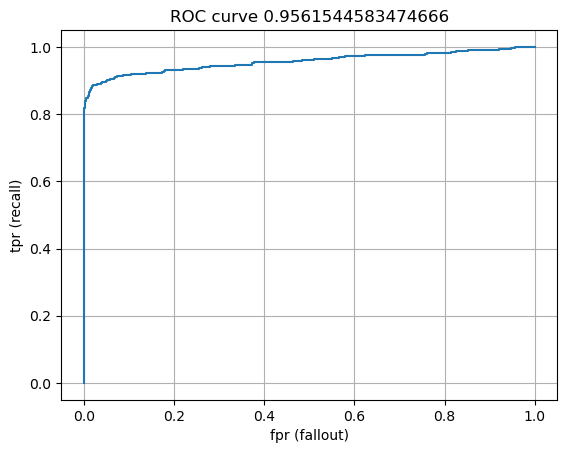

In [57]:
# Compare Models

# model trained on 100% of X_train
best_logistic_oversampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampling', SMOTE(random_state=42)),
        ('model', best_estm_logsitic_clf)
    ])

y_scores = cross_val_predict(best_logistic_oversampling_pipeline, X_train, y_train, cv=3, method='decision_function')

precision_values, recall_values, thresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
# plt.plot(precision_values[:-1], recall_values[:-1])
plt.plot(fpr, tpr)
# plt.xlabel('recall')
# plt.ylabel('precision')
plt.title(f"ROC curve {roc_auc_score(y_train, y_scores)}")
plt.xlabel('fpr (fallout)')
plt.ylabel('tpr (recall)')
plt.grid()
plt.show()

# We Should Observe PR Curve not ROC Curve as +ve is Rare

Text(0, 0.5, 'precision')

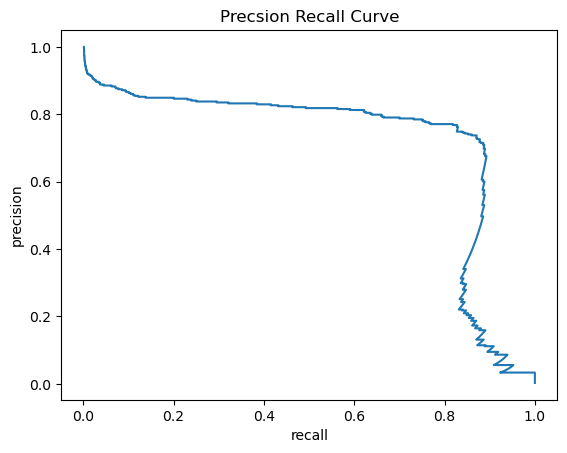

In [58]:
plt.plot(precision_values[:-1], recall_values[:-1])
plt.title("Precsion Recall Curve")
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = 0.76, Recall=0.6

# Now our model is not overfitting (not like model above)

In [59]:
# Final Model
best_logistic_oversampling_pipeline = Imbalanced_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampling', SMOTE(random_state=42)),
        ('model', best_estm_logsitic_clf)
    ])

best_logistic_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = best_logistic_oversampling_pipeline.predict(X_train) 
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}") # train accuracy
print(f"Train F1 Score: {f1_score(y_train, y_train_pred)}") # train F1
print(f"Train Precsion: {precision_score(y_train, y_train_pred)}") # train Precsion
print(f"Train Recall: {recall_score(y_train, y_train_pred)}") # train Recall

Train Accuracy: 0.9737245825463123
Train F1 Score: 0.09829580036518563
Train Precsion: 0.05197940135178629
Train Recall: 0.9022346368715084


# Final Compare

Text(0, 0.5, 'precision')

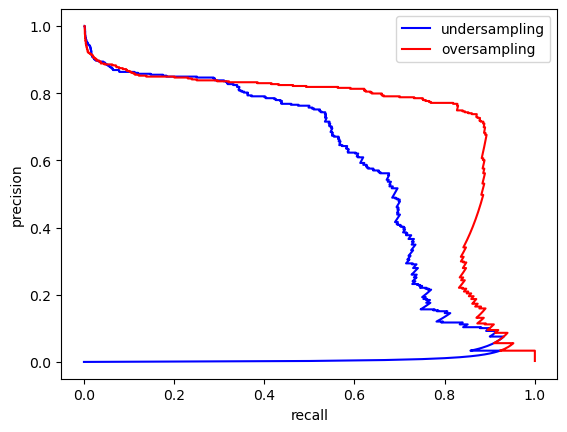

In [60]:
# Undersampling vs Oversampling => PR Curve
# using Validation (Oversampling Win)
y_over_scores = cross_val_predict(best_logistic_oversampling_pipeline, X_train, y_train, cv=3, method='decision_function')
y_under_scores = cross_val_predict(best_logistic_undersampling_pipeline, X_train, y_train, cv=3, method='decision_function')
precision_under_values, recall_under_values, thresholds_under = precision_recall_curve(y_train, y_under_scores)
precision_over_values, recall_over_values, thresholds_over = precision_recall_curve(y_train, y_over_scores)

plt.plot(precision_under_values[:-1], recall_under_values[:-1], label='undersampling', color='blue')
plt.plot(precision_over_values[:-1], recall_over_values[:-1], label='oversampling', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = 0.76, Recall=0.6

In [61]:
# OverSampling Technique is better
y_over_pred = cross_val_predict(best_logistic_oversampling_pipeline, X_train, y_train, cv=3, method='predict')

confusion_matrix(y_train, y_over_pred) # recall=90% but 

array([[218999,   6177],
       [    41,    317]], dtype=int64)

In [62]:
# Problem: its big error if we said fraud detected as non fraud so we need to increae Recall and decreae precsion 
indx = np.argmax(recall_over_values <= 0.80)
t_80_recall = thresholds_over[indx]
y_over_scores = cross_val_predict(best_logistic_oversampling_pipeline, X_train, y_train, cv=3, method='decision_function')
y_over_threshold_pred = (y_over_scores >= t_80_recall)
print(f"Accuracy: {accuracy_score(y_train, y_over_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_over_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_over_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_over_threshold_pred)}") # Recall

Accuracy: 0.9989624624225172
F1 Score: 0.7096774193548387
Precsion: 0.6383928571428571
Recall: 0.7988826815642458


In [63]:
confusion_matrix(y_train, y_over_threshold_pred) # recall=80% precsion=63%

array([[225014,    162],
       [    72,    286]], dtype=int64)

# 4) Test Accuracy

In [64]:
y_over_test_scores = best_logistic_oversampling_pipeline.decision_function(X_test)
y_over_test_threshold_pred = (y_over_test_scores >= t_80_recall)
print(f"Test Accuracy: {accuracy_score(y_test, y_over_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_over_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_over_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_over_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.9990422814982974
Test F1 Score: 0.7452830188679245
Test Precsion: 0.6475409836065574
Test Recall: 0.8777777777777778


In [65]:
confusion_matrix(y_test, y_over_test_threshold_pred)

array([[56251,    43],
       [   11,    79]], dtype=int64)